In [1]:
# input data
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
import pandas as pd
#table
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df["target"]=iris['target']
df.to_csv('iris.csv',encoding='utf-8',index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

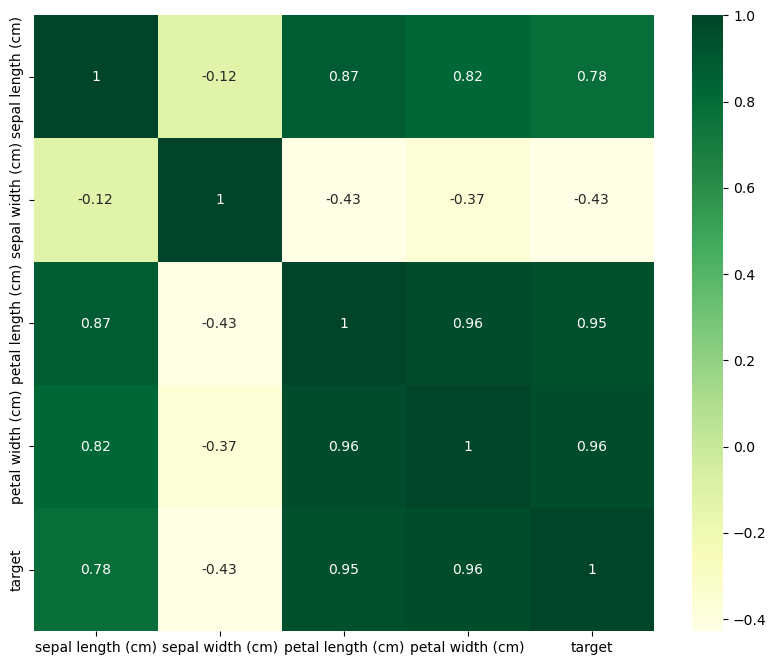

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#Automatic display plt.show
%matplotlib inline
#image size (width, height)
plt.figure(figsize=(10,8))
#heat map,corr->Correlation,cmap->color,annot->display numbers
sns.heatmap(df.astype("float").corr(),cmap='YlGn',annot=True)

In [4]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [5]:
from sklearn.model_selection import train_test_split
#train_test_split->(characteristic 90%, characteristic 10%, target 90%, target 10%)
#axis=1->column,axis=0->row
x_train,x_test,y_train,y_test=train_test_split(df.drop(["target"],axis=1),df["target"],test_size=0.1)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

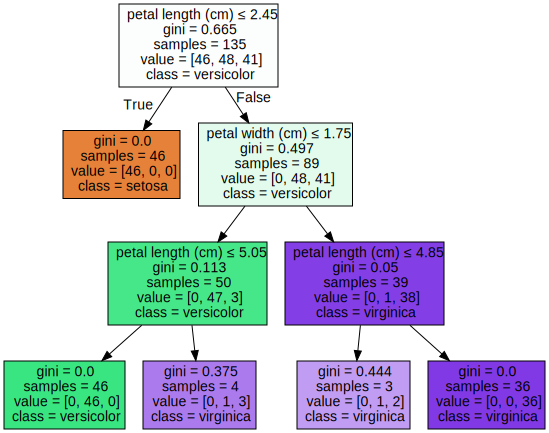

In [7]:
from sklearn.tree import export_graphviz
import graphviz
# filled=True：Specifies whether the decision tree is filled with the color of the nodes;
# special_characters=True：Specify if you want special characters
g=export_graphviz(clf, out_file=None, feature_names=iris["feature_names"],class_names=iris["target_names"],filled=True,special_characters=True)
graph=graphviz.Source(g)
graph

In [8]:
#predict
pre=clf.predict(x_test)
print("predict result:",list(pre))
print("real result:",list(y_test))

predict result: [2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1]
real result: [2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1]


In [9]:
#accuracy_score
from sklearn.metrics import accuracy_score
print("chance of predicting success:",accuracy_score(pre,y_test))

chance of predicting success: 0.8666666666666667


In [10]:
#混淆矩陣confusion_matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

,0,1,2
0,4,0,0
1,0,2,0
2,0,2,7
